Maps - Event Locations

/tmp/ipykernel_408348/500266277.py:14: DtypeWarning: Columns (6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data_events = pd.read_csv('../../resources/processed/allinfo_eventsBS_PS53550.txt',sep=',')


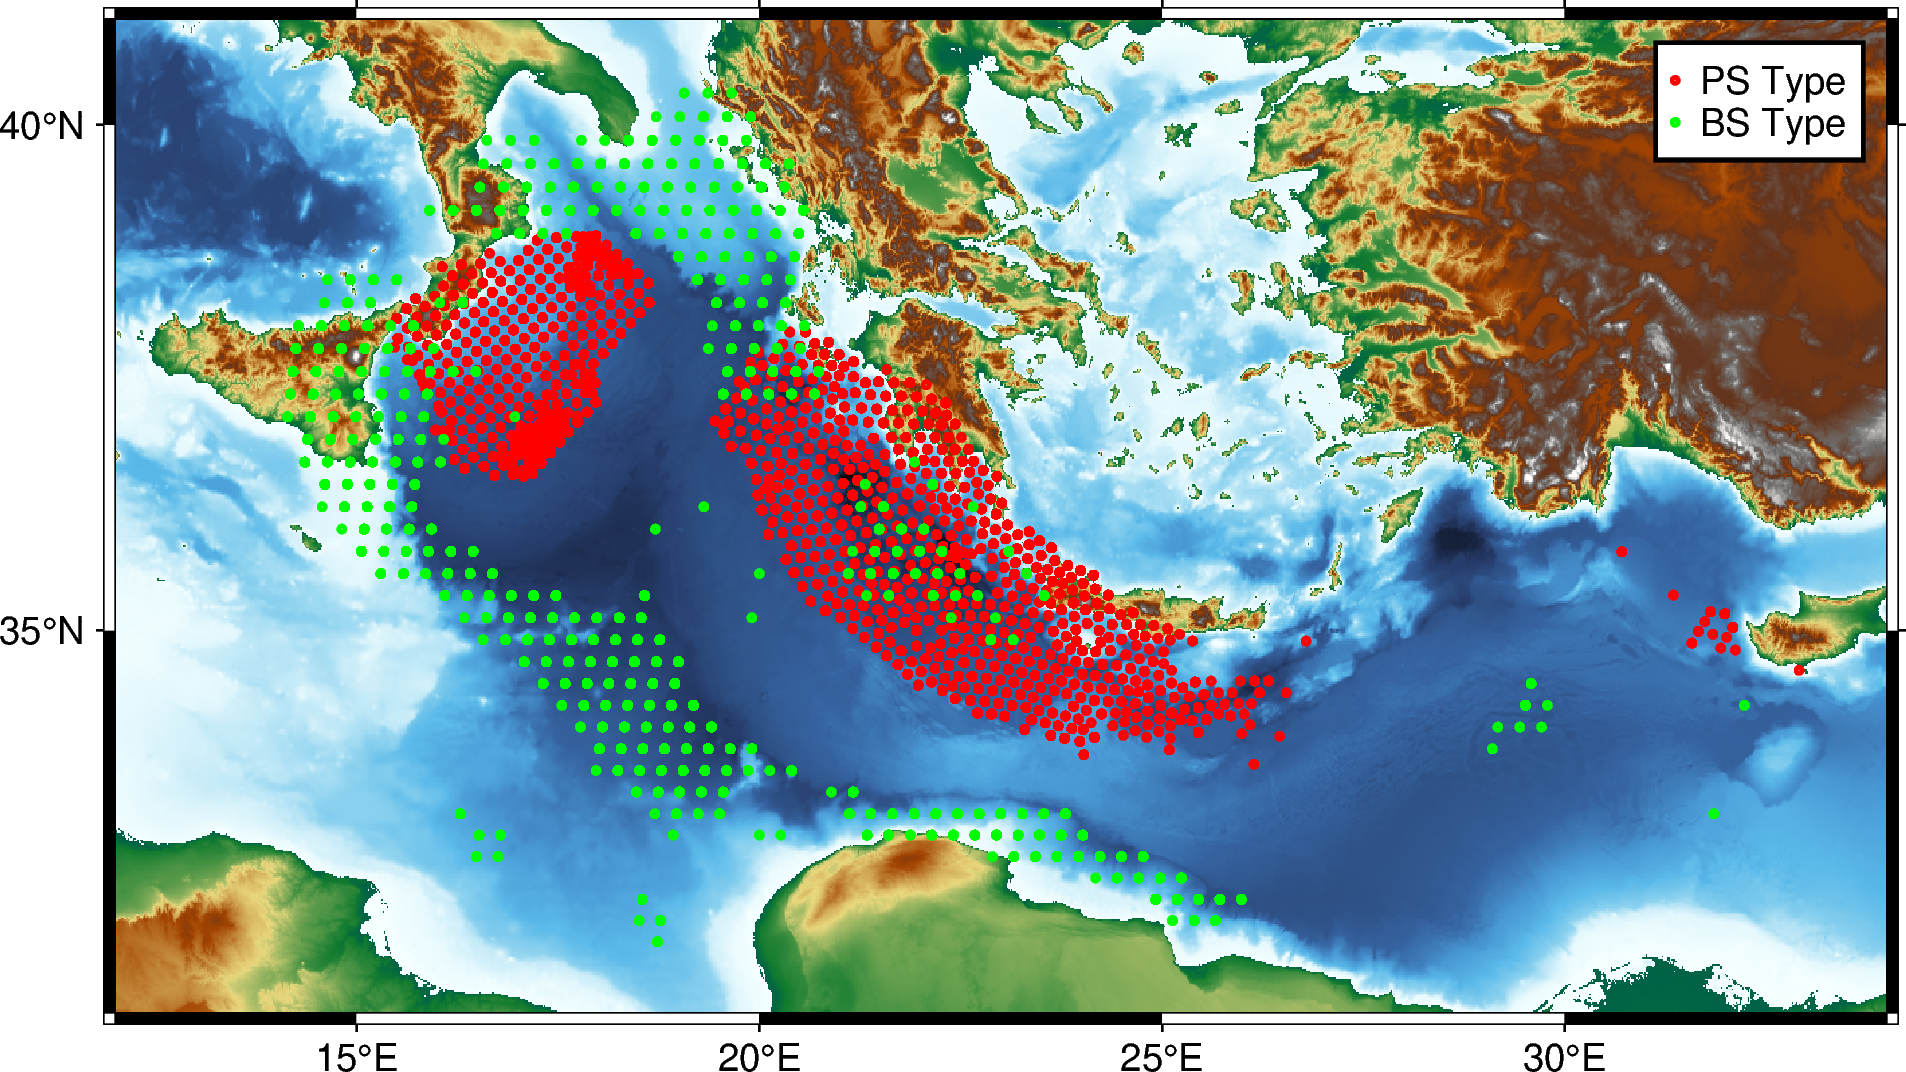

In [1]:
import os
import numpy as np
import pygmt
import pandas as pd

fig = pygmt.Figure()

# Load the grid
grid = pygmt.datasets.load_earth_relief(resolution="01m",region=[12, 34, 31, 41])
fig = pygmt.Figure()
fig.grdimage(grid=grid, projection="M15c", frame="a", cmap="geo")

# Load the earthquake events data
data_events = pd.read_csv('../../resources/processed/allinfo_eventsBS_PS53550.txt',sep=',')


# Filter data by event type
ps_data = data_events[data_events['Type'] == 'PS']
bs_data = data_events[data_events['Type'] == 'BS']

# Create scatter plots for PS and BS data
fig.plot(
    x=ps_data['lon'],
    y=ps_data['lat'],
    style="c0.05",
    pen="1p,red",
    label="PS Type",
)
fig.plot(
    x=bs_data['lon'],
    y=bs_data['lat'],
    style="c0.05",
    pen="1p,green",
    label="BS Type",
)

# Add a legend	
fig.legend()

# Save or display the map
fig.savefig("plots/pygmt_map_eq.png")
fig.show()


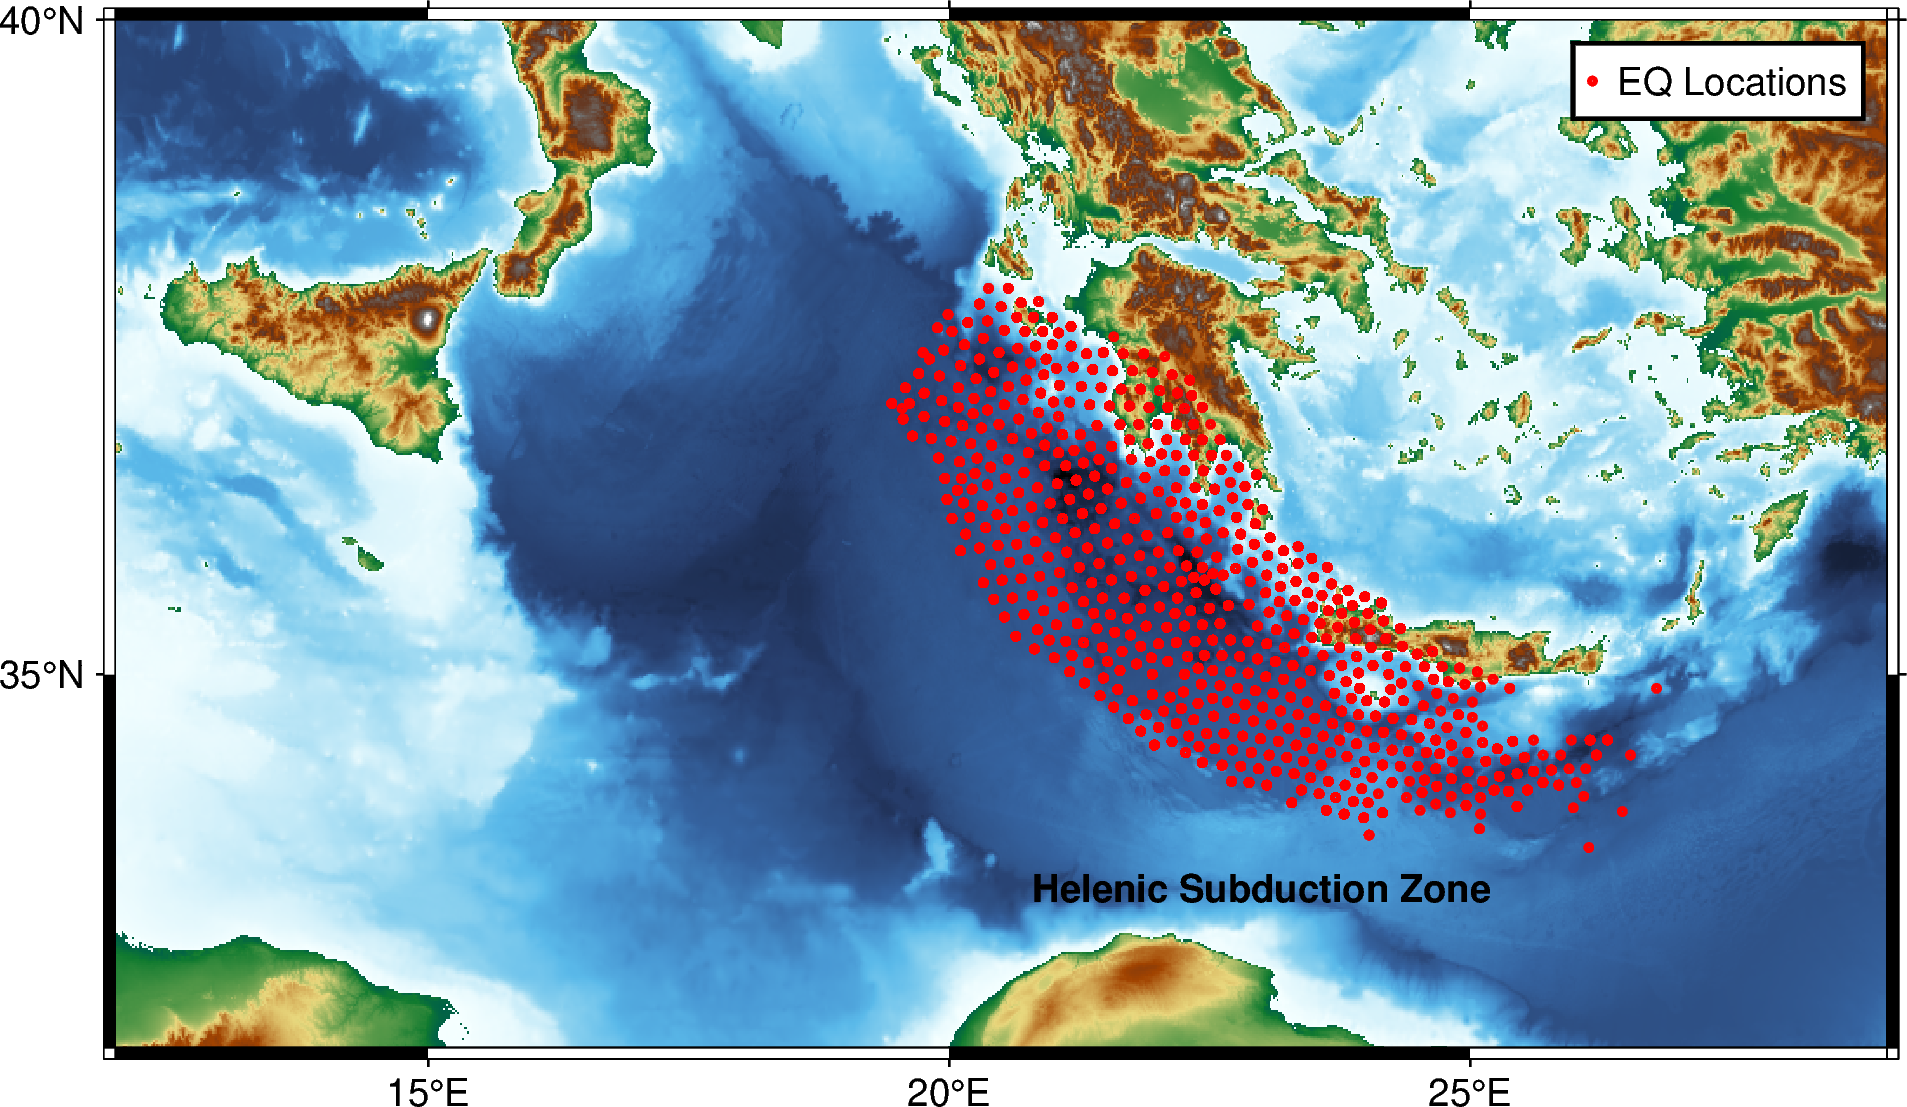

In [14]:
import os
import numpy as np
import pygmt
import pandas as pd

fig = pygmt.Figure()

# Load the grid
grid = pygmt.datasets.load_earth_relief(resolution="01m",region=[12, 29, 32, 40])
fig = pygmt.Figure()
fig.grdimage(grid=grid, projection="M15c", frame="a", cmap="geo")

# Load the earthquake events data
data_events = pd.read_csv('../../data/info/PS_Helenic_sampling_input_CT_41.csv',sep=',')

# Create scatter plots for PS and BS data
fig.plot(
    x=data_events['lon'],
    y=data_events['lat'],
    style="c0.05",
    pen="1p,red",
    label="EQ Locations",
)

#annotate subduction zone with text wrapped at 40 characters

fig.text(
    x=23,
    y=33.3,
    text="Helenic Subduction Zone",
    font="Helvetica-Bold",

)

# Add a legend	
fig.legend()

# Save or display the map
fig.savefig("plots/poster_map_eq.png")
fig.show()


Study Site

grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 37.5888 to 37.5888888889


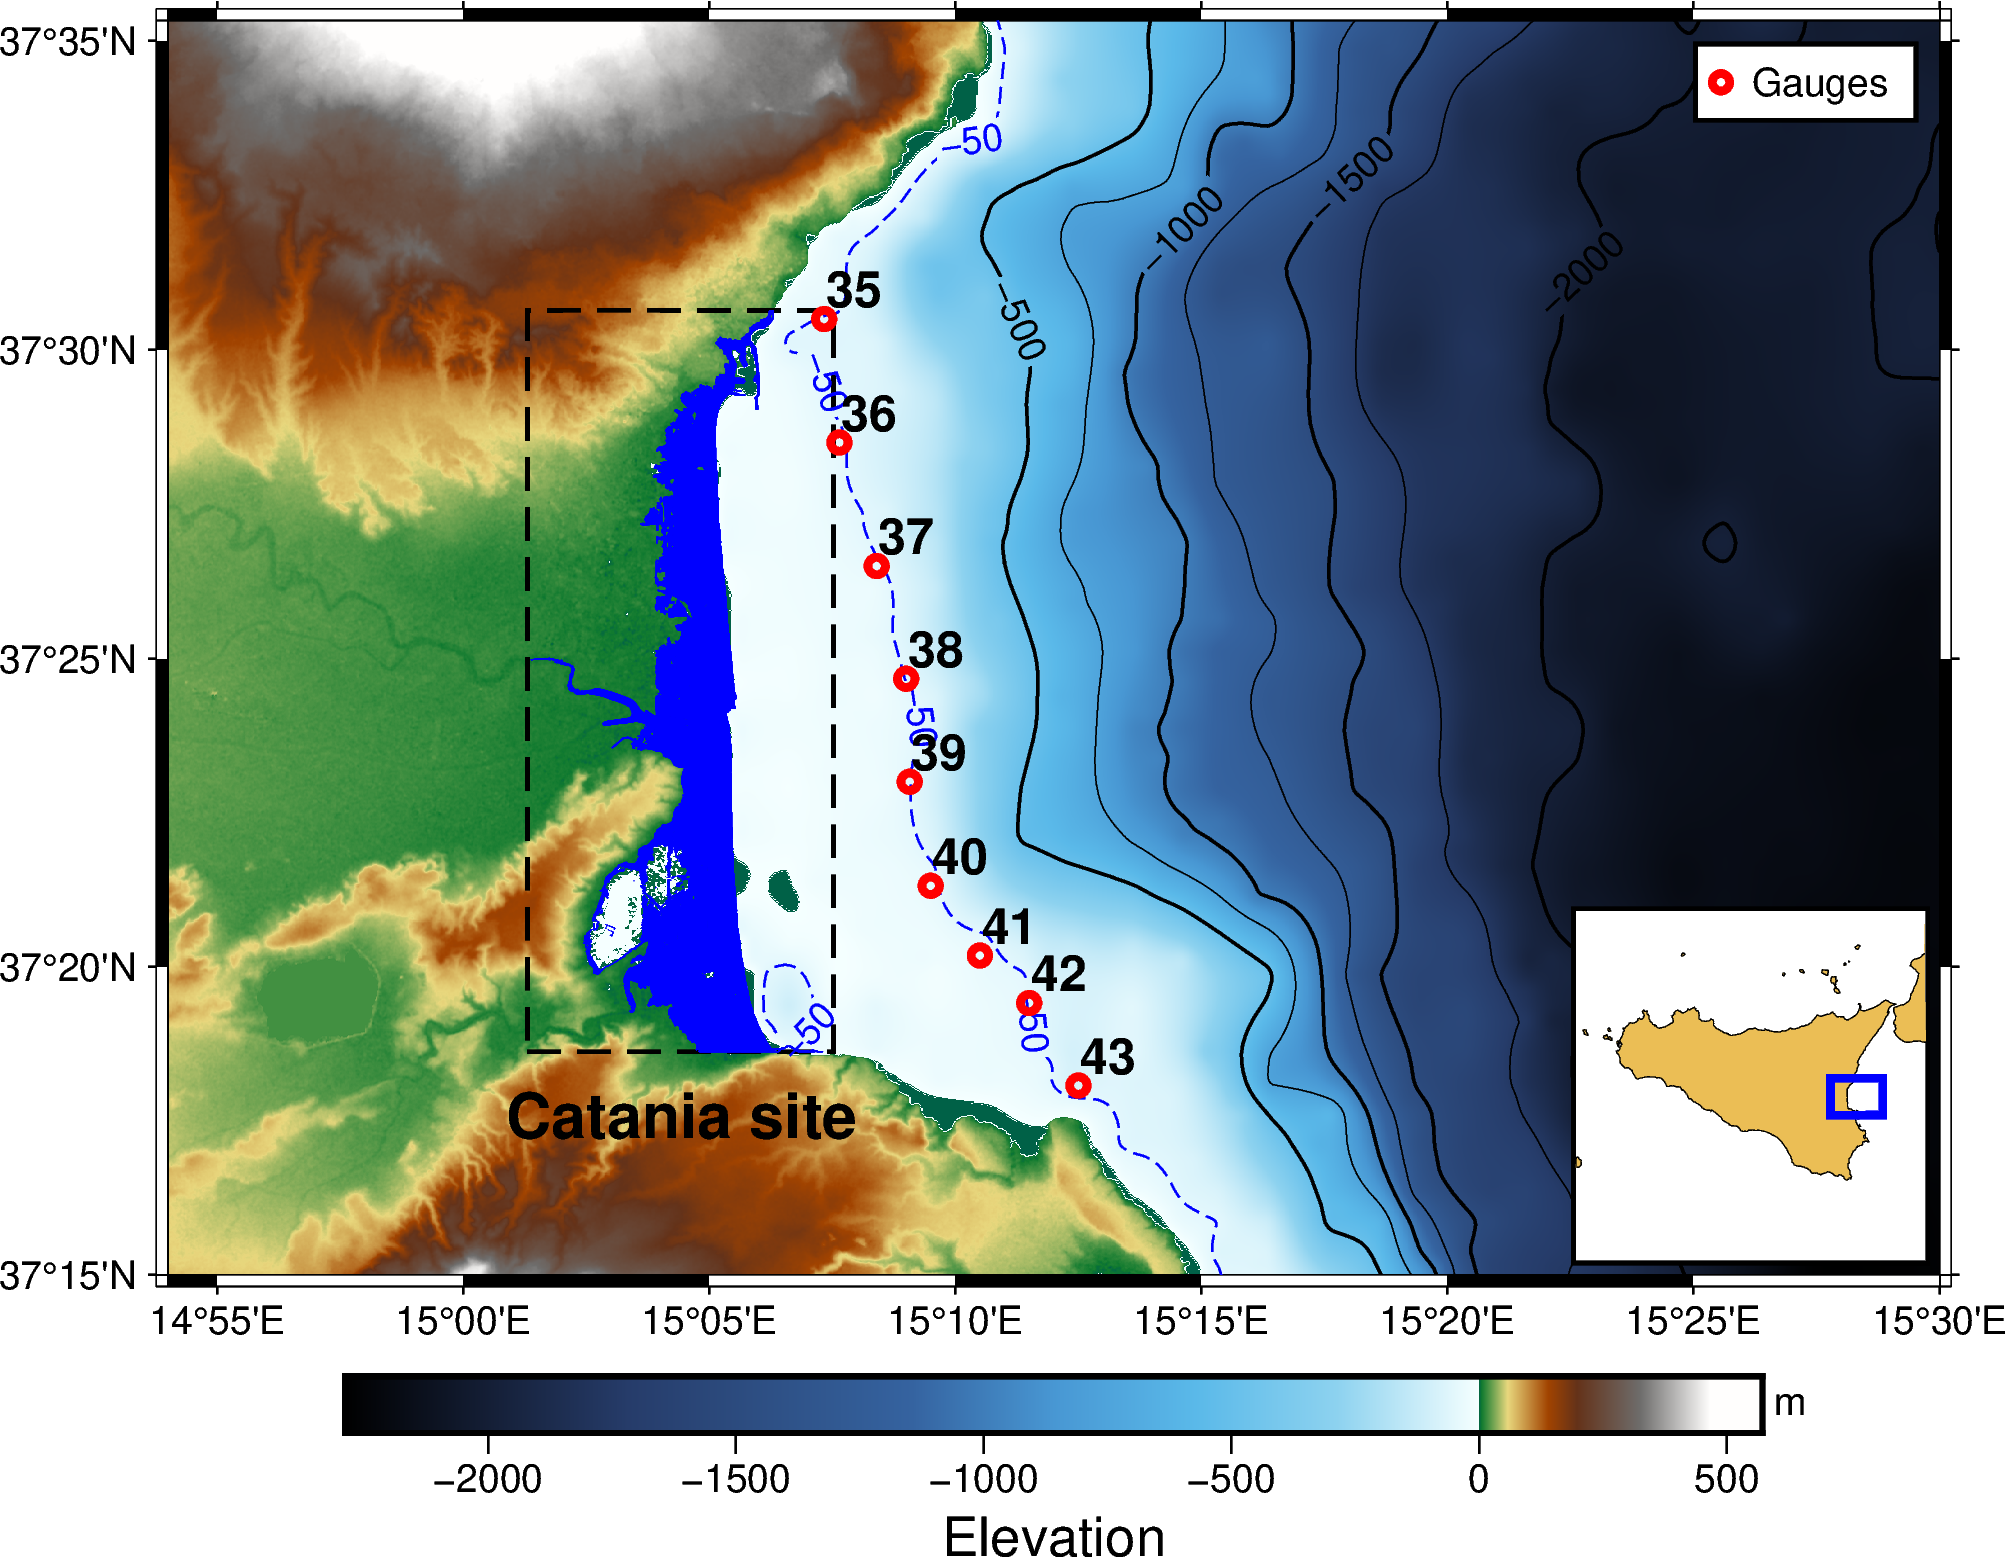

In [14]:
import pygmt
import xarray as xr
import pandas as pd
import numpy as np

#main plot region
region=[14.9, 15.5,37.25, 37.5888]

#read grid lat lon info from text file
grid_info = pd.read_csv('../../data/processed/lat_lon_idx_CT_3200.txt',sep=',')
#add columns name
grid_info.columns = ['m','n','lat','lon']

# Load the grid
grid_CT = xr.open_dataset('../../data/processed/CT_defbathy.nc',engine='netcdf4')

grid = pygmt.datasets.load_earth_relief(
    resolution="01s", region=region, registration="gridline"
)

#read offshore points from 
gauges = pd.read_csv('../../resources/raw/pois_depth.csv',sep=',')

CT_gauges = list(range(35,44))

#combine both
selected_gauges =  gauges.iloc[CT_gauges]

fig = pygmt.Figure()

fig.grdimage(grid=grid, frame="a", projection="M15c", cmap="geo",transparency=50)

#plot CT and SR grids area as rectangles
fig.plot(
    data = np.array([[float(grid_CT['x'].min().values),
                    float(grid_CT['y'].min().values),
                    float(grid_CT['x'].max()),
                    float(grid_CT['y'].max())]]),
    style='r+s',
    pen= "1p,black,-",)

#plot grids from text file
fig.plot(
        x = grid_info['lon'],
        y = grid_info['lat'],
        transparency=90,
        style="s0.0022c",
        pen="0.005p,blue",
)

# fig.coast(shorelines="2p,gray",region=[14.9, 15.5,37.25, 37.5888],frame="a", projection="M15c",)
fig.grdcontour(grid=grid, interval=250, annotation=500,limit=[-2000, -500])
fig.grdcontour(grid=grid, interval=50, annotation=50,limit=[-56, -49], pen="0.5p,blue,--",label_placement="d3c")

fig.plot(
    x=selected_gauges['lon'],
    y=selected_gauges['lat'],
    style="c0.15",
    pen="2p,red",
    label="Gauges ",
)

#add annotations for gauges
for i in range(len(selected_gauges)):
    fig.text(
        x=selected_gauges['lon'].iloc[i],
        y=selected_gauges['lat'].iloc[i],
        text=selected_gauges['id'].iloc[i],
        font="12p,Helvetica-Bold,black",
        justify="CM",
        offset="0.25c",
    )


fig.text(
    x=15.07,    
    y=37.29,
    text="Catania site",
    font="15p,Helvetica-Bold,black",
    justify="CM",
    offset="0.1c",
)


with fig.inset(position="jBR+w3c/3c+o0.1c", box="+gwhite+p1p"):
    # Plot the Sicily main land in the inset using coast. "U54S/M?" means UTM
    # projection with map width automatically determined from the inset width.
    # Highlight the Japan area in "lightbrown"
    # and draw its outline with a pen of "0.2p".
    fig.coast(
        region=[12, 16, 36, 39],
        projection="U33S/?",
        dcw="IT+glightbrown+p0.2p",
        area_thresh=10000,
    )
    # Plot a rectangle ("r") in the inset map to show the area of the main figure.
    # "+s" means that the first two columns are the longitude and latitude of
    # the bottom left corner of the rectangle, and the last two columns the
    # longitude and latitude of the uppper right corner.
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data=rectangle, style="r+s", pen="2p,blue")

fig.colorbar(frame=["a500", "x+lElevation", "y+lm"])
fig.legend()
fig.savefig('./plots/poster_regions.png')
fig.show()


plot [WARNING]: Length <unit> r not supported - revert to default unit [cm]
plot [WARNING]: 0.15+ not a valid number and may not be decoded properly.


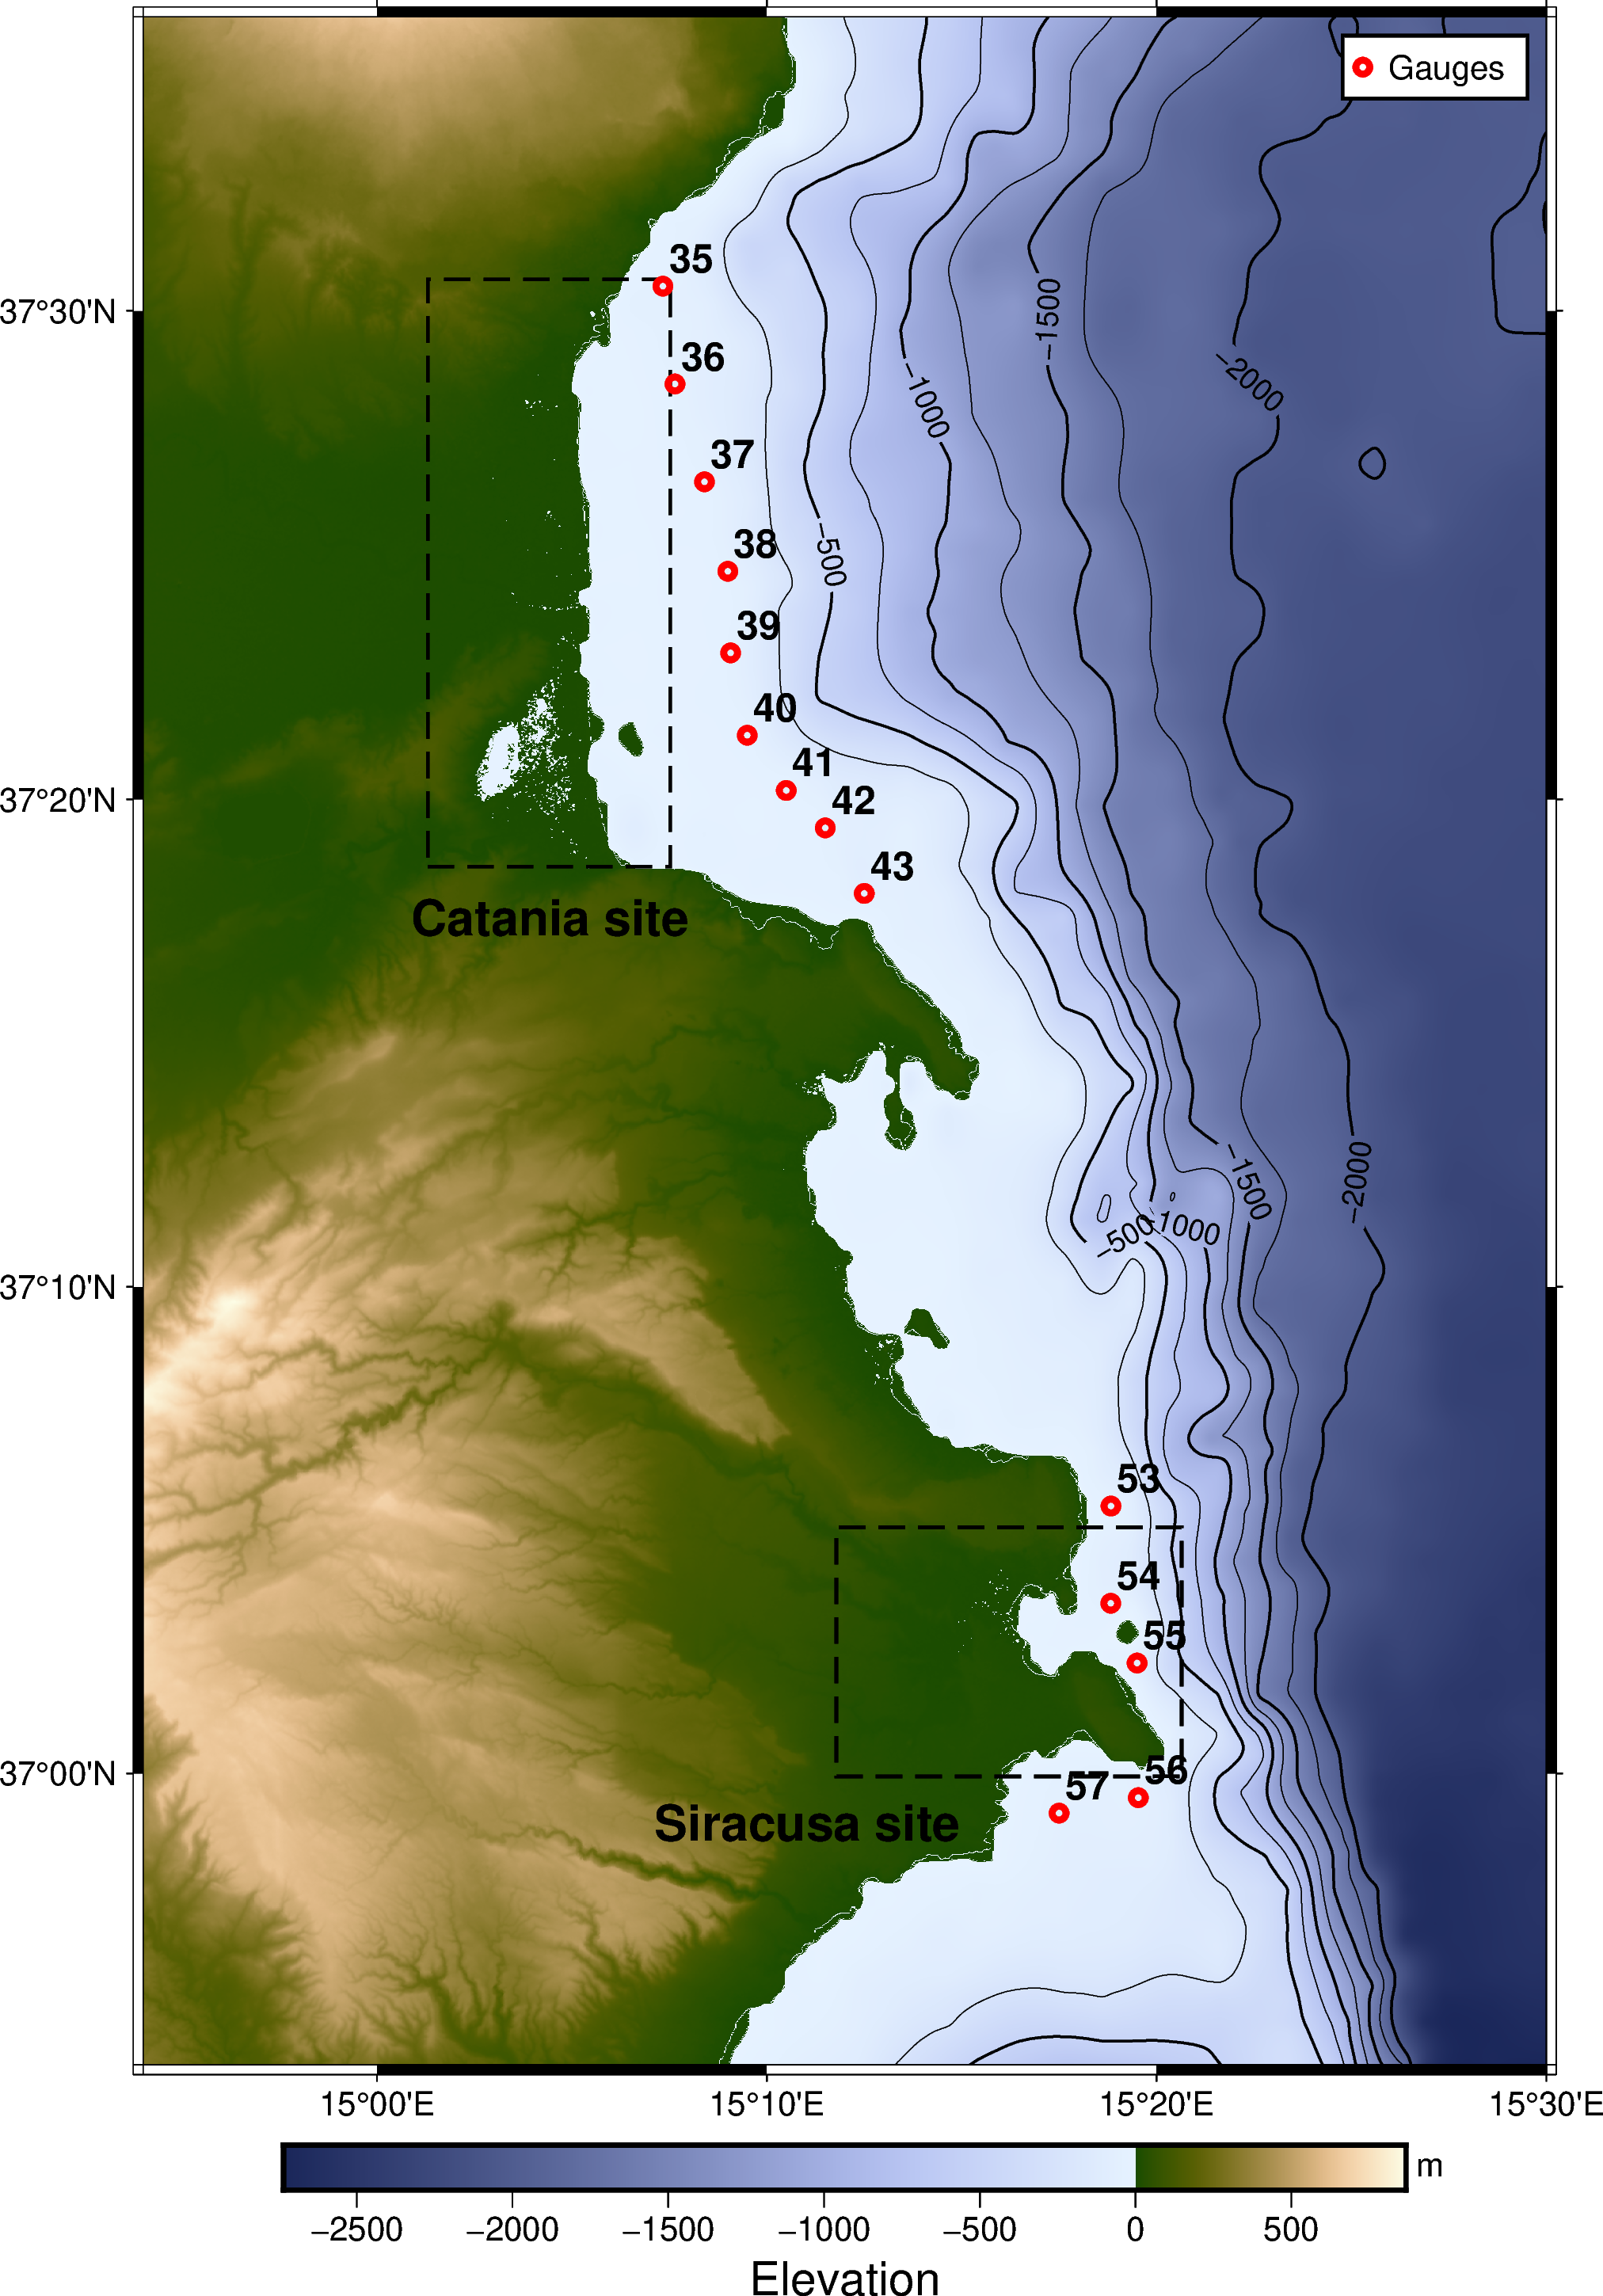

In [1]:
import pygmt
import xarray as xr
import pandas as pd
import numpy as np


# Load the grid
grid_CT = xr.open_dataset('../../data/processed/CT_defbathy.nc',engine='netcdf4')
grid_SR = xr.open_dataset('../../data/processed/SR_defbathy.nc',engine='netcdf4')

grid = pygmt.datasets.load_earth_relief(
    resolution="01s", region=[14.9, 15.5,36.9, 37.6], registration="gridline"
)

#read offshore points from 
gauges = pd.read_csv('../../resources/raw/pois_depth.csv',sep=',')

CT_gauges = list(range(35,44))
SR_gagues = list(range(53,58))

#combine both
selected_gauges =  gauges.iloc[CT_gauges + SR_gagues]

fig = pygmt.Figure()
fig.grdimage(grid=grid, frame="a", projection="M15c", cmap="oleron")
fig.grdcontour(grid=grid, interval=250, annotation=500,limit=[-2000, -10])
# fig.coast(shorelines="2p,gray")

#plot CT and SR grids area as rectangles
fig.plot(
    data = np.array([[float(grid_CT['x'].min().values),
                    float(grid_CT['y'].min().values),
                    float(grid_CT['x'].max()),
                    float(grid_CT['y'].max())]]),
    style='r+s',
    pen= "1p,black,-",)

fig.plot(
    data = np.array([[float(grid_SR['x'].min().values),
                    float(grid_SR['y'].min().values),
                    float(grid_SR['x'].max()),
                    float(grid_SR['y'].max())]]),
    style='r+s',
    pen= "1p,black,-",)

fig.plot(
    x=selected_gauges['lon'],
    y=selected_gauges['lat'],
    style="c0.15+r",
    pen="2p,red",
    label="Gauges ",
)

#add annotations for gauges
for i in range(len(selected_gauges)):
    fig.text(
        x=selected_gauges['lon'].iloc[i],
        y=selected_gauges['lat'].iloc[i],
        text=selected_gauges['id'].iloc[i],
        font="12p,Helvetica-Bold,black",
        justify="CM",
        offset="0.3c",
    )


fig.text(
    x=15.07,    
    y=37.29,
    text="Catania site",
    font="15p,Helvetica-Bold,black",
    justify="CM",
    offset="0.1c",
)

fig.text(
    x=15.18,    
    y=36.98,
    text="Siracusa site",
    font="15p,Helvetica-Bold,black",
    justify="CM",
    offset="0.1c",
)

fig.colorbar(frame=["a500", "x+lElevation", "y+lm"])
fig.legend()
fig.savefig('./plots/pygmt_regions.png')
fig.show()


Check model parameters and size

In [1]:
from torchsummary import summary
import model_utils as utils
import torch
model = torch.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/SR/out/model_coupled_off[64, 128, 256]_on[64, 64]_epoch_1000_900.pt",map_location=torch.device('cpu'))
model.eval()
# summary(model,[(5,480),(186181,)])
summary(model,[(5,480),(186181,)])

Autoencoder_coupled(
  (offshore_encoder): Sequential(
    (0): Conv1d(5, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): LeakyReLU(negative_slope=0.5, inplace=True)
    (2): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    (3): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): LeakyReLU(negative_slope=0.5, inplace=True)
    (5): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    (6): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (7): LeakyReLU(negative_slope=0.5, inplace=True)
    (8): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    (9): Dropout(p=0.1, inplace=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=15360, out_features=64, bias=True)
  )
  (deform_encoder): Sequential(
    (0): Linear(in_features=186181, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negati